1.1 การทดสอบความเที่ยงตรง (Precision) ของวิธี Holdout

In [9]:
import numpy as np
import math
from pandas import *
import matplotlib.pyplot as plt
import pandas as pd
 
# reading CSV file
data1 = read_csv("HeightWeight20.csv")
data2 = read_csv("HeightWeight100.csv")
data3 = read_csv("HeightWeight.csv")
 
# converting column data to list
Height1 = data1['Height'].tolist()
Weight1 = data1['Weight'].tolist()

Height2 = data2['Height'].tolist()
Weight2 = data2['Weight'].tolist()

Height3 = data3['Height'].tolist()
Weight3 = data3['Weight'].tolist()

#list of data
Height = [Height1, Height2, Height3]
Weight = [Weight1, Weight2, Weight3]


# Split the data into training and test sets (80% training, 20% test)
def train_test_split(X, y, train_size):
    n_samples = len(X)
    n_train = int(n_samples * train_size)
    indices = np.random.permutation(n_samples)
    X_test = X[indices[:-n_train]]
    y_test = y[indices[:-n_train]]
    X_train = X[indices[-n_train:]]
    y_train = y[indices[-n_train:]]
    return X_train, X_test, y_train, y_test


# Define linear regression model and fit it to the training data
def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

#Mean square error
def MSE(X_train, X_test, y_train, y_test):
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = Normal_Equation(X_train,y_train)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1*X_test)-y_test)**2)
    return S/(len(X_test))

#Hold out
def holdout(X, y, train_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size)
    return MSE(X_train, X_test, y_train, y_test)

train = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
data = ['95%', '90%', '85%', '80%', '75%', '70%', "65%", '60%', '55%', '50%', '45%', '40%', '35%', '30%', '25%', '20%', '15%', '10%']
number = ['20','100','10000']


#Create csv for each csv file 
for h, w, n in zip(Height, Weight, number):
    all_data = {seed: [] for seed in train}
    for i in train:
        for j in range(1,101):
            np.random.seed(j)
            X = np.array(h).reshape(-1, 1)
            y = np.array(w).reshape(-1, 1)
            mse = holdout(X, y, train_size=i)
            rmse = math.sqrt(mse) 
            all_data[i].append(rmse)

    rmse = math.sqrt(MSE(X, X, y, y))
    print('RMSE',round(rmse,4))
    print('')

    df = pd.DataFrame(all_data)
    column_averages = np.mean(df, axis=0)
    column_std = np.std(df, axis=0)

    df = df.append(column_averages, ignore_index=True)
    df = df.append(column_std, ignore_index=True)

    df = df.rename(index=lambda x: x + 1)
    df = df.rename({df.index[-2]: 'Averages', df.index[-1]: 'Std'}, axis='index')
    df.columns = data

    df = df.round(3)
    df.to_csv('holdout_csv'+ n +'.csv', index_label='Row')


RMSE 6.6975

RMSE 5.7247



C:\Users\Best\AppData\Local\Temp\ipykernel_33060\2612787838.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(column_averages, ignore_index=True)
C:\Users\Best\AppData\Local\Temp\ipykernel_33060\2612787838.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(column_std, ignore_index=True)
C:\Users\Best\AppData\Local\Temp\ipykernel_33060\2612787838.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(column_averages, ignore_index=True)
C:\Users\Best\AppData\Local\Temp\ipykernel_33060\2612787838.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(column_std, ignore_index=True

RMSE 5.5422



C:\Users\Best\AppData\Local\Temp\ipykernel_33060\2612787838.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(column_averages, ignore_index=True)
C:\Users\Best\AppData\Local\Temp\ipykernel_33060\2612787838.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(column_std, ignore_index=True)


1.2  การทดสอบความเที่ยงตรง (Precision) ของวิธี k- fold Cross-Validation

In [ ]:
import random
import pandas as pd
import numpy as np
import statistics
import math

data1 = pd.read_csv("HeightWeight20.csv")
data2 = pd.read_csv("HeightWeight20.csv")

Height = data1['Height'].tolist()
Weight = data2['Weight'].tolist()

data = list(zip(Height, Weight))

def Normal_Equation(X, Y):
    A = np.dot(X.T, X)
    B = np.dot(X.T, Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I, B)
    return W

def MSE(X_train, X_test, y_train, y_test):
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = Normal_Equation(X_train, y_train)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1 * X_test) - y_test)**2)
    return S / (len(X_test))

def cross_Validation(data):
    mse_dict = {" Seed ": range(1,501)}
    avg_list =['Average']
    sd_list = ['Standard Deviation']
    for fold in [10,5,3,2]:
        print('fold = ', fold)
        all_Seed_MSE=[]
        for seed in range(1, 501):
            print(f"Seed: {seed}")
            
            random.seed(seed) 
            shuffled_data = data.copy()
            random.shuffle(shuffled_data)

            mse = []
            for i in range(fold):
                split_size = len(shuffled_data) // fold
                test_pairs = shuffled_data[i * split_size : (i + 1) * split_size]
                train_pairs = [pair for pair in shuffled_data if pair not in test_pairs]
                
                x_train, y_train = zip(*train_pairs)
                x_test, y_test = zip(*test_pairs)

                x_train = np.array(x_train)  
                x_test = np.array(x_test)
                y_train = np.array(y_train) 
                y_test = np.array(y_test) 
                each_seed_mse = math.sqrt(MSE(x_train, x_test, y_train, y_test))
                mse.append(each_seed_mse)
                # print(each_seed_mse)

            seed_mean = statistics.fmean(mse)  #หา MEAN ของแต่ละ seed 
            print(f'avg rmse seed {seed} = ',seed_mean)
            seed_mean = round(seed_mean,3)
            all_Seed_MSE.append(seed_mean)
            mse_dict[f"{fold} fold"] = all_Seed_MSE

        avg_fold_rmse = round(statistics.mean(all_Seed_MSE),3)# หา MEAN RMSE ของทุก seed ในแต่ละ fold
        sd_fold_rmse = round(statistics.stdev(all_Seed_MSE),3)
        print(f"average of fold = {fold} is :",avg_fold_rmse)
        print(f"sd of fold = {fold} is : ",sd_fold_rmse)
        avg_list.append(avg_fold_rmse)
        sd_list.append(sd_fold_rmse)
        print(avg_list)

        
    df = pd.DataFrame(mse_dict)
    df.loc[len(df.index)] = avg_list
    df.loc[len(df.index)] = sd_list
    print(df)
    df.to_csv('Cross-Validation.csv')

cross_Validation(data)

1.3 การทดสอบความเที่ยงตรง (Precision) และความ แม่นยํา (Accuracy) เมื่อจํานวนข้อมูลมากขึ้น

Holdout โค้ดเหมือนกับข้อ 1.1

In [ ]:
import numpy as np
import math
from pandas import *
import matplotlib.pyplot as plt
import pandas as pd
 
# reading CSV file
data1 = read_csv("HeightWeight20.csv")
data2 = read_csv("HeightWeight100.csv")
data3 = read_csv("HeightWeight.csv")
 
# converting column data to list
Height1 = data1['Height'].tolist()
Weight1 = data1['Weight'].tolist()

Height2 = data2['Height'].tolist()
Weight2 = data2['Weight'].tolist()

Height3 = data3['Height'].tolist()
Weight3 = data3['Weight'].tolist()

#list of data
Height = [Height1, Height2, Height3]
Weight = [Weight1, Weight2, Weight3]


# Split the data into training and test sets (80% training, 20% test)
def train_test_split(X, y, train_size):
    n_samples = len(X)
    n_train = int(n_samples * train_size)
    indices = np.random.permutation(n_samples)
    X_test = X[indices[:-n_train]]
    y_test = y[indices[:-n_train]]
    X_train = X[indices[-n_train:]]
    y_train = y[indices[-n_train:]]
    return X_train, X_test, y_train, y_test


# Define linear regression model and fit it to the training data
def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

#Mean square error
def MSE(X_train, X_test, y_train, y_test):
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = Normal_Equation(X_train,y_train)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1*X_test)-y_test)**2)
    return S/(len(X_test))

#Hold out
def holdout(X, y, train_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size)
    return MSE(X_train, X_test, y_train, y_test)

train = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
data = ['95%', '90%', '85%', '80%', '75%', '70%', "65%", '60%', '55%', '50%', '45%', '40%', '35%', '30%', '25%', '20%', '15%', '10%']
number = ['20','100','10000']


#Create csv for each csv file 
for h, w, n in zip(Height, Weight, number):
    all_data = {seed: [] for seed in train}
    for i in train:
        for j in range(1,101):
            np.random.seed(j)
            X = np.array(h).reshape(-1, 1)
            y = np.array(w).reshape(-1, 1)
            mse = holdout(X, y, train_size=i)
            rmse = math.sqrt(mse) 
            all_data[i].append(rmse)

    rmse = math.sqrt(MSE(X, X, y, y))
    print('RMSE',round(rmse,4))
    print('')

    df = pd.DataFrame(all_data)
    column_averages = np.mean(df, axis=0)
    column_std = np.std(df, axis=0)

    df = df.append(column_averages, ignore_index=True)
    df = df.append(column_std, ignore_index=True)

    df = df.rename(index=lambda x: x + 1)
    df = df.rename({df.index[-2]: 'Averages', df.index[-1]: 'Std'}, axis='index')
    df.columns = data

    df = df.round(3)
    df.to_csv('holdout_csv'+ n +'.csv', index_label='Row')


Cross validation

In [ ]:
import numpy as np
import math
from pandas import *
from pandas import *
 
# reading CSV file
data1 = read_csv("C:\Github\ML\Data\HeightWeight100.csv")
data2 = read_csv("C:\Github\ML\Data\HeightWeight100.csv")

# converting column data to list
Height = data1['Height'].tolist()
Weight = data1['Weight'].tolist()

data = list(zip(Height,Weight))
rmse_1 = []
rmse_2 = []
rmse_3 = []
rmse_4 = []
rmse_5 = []
x = np.linspace(-1, 1, 1000)

# Split the data into training and test sets (80% training, 20% test)
def train_test_split(X, y, train_size):
    n_samples = len(X)
    n_train = int(n_samples * train_size)
    indices = np.random.permutation(n_samples)
    X_test = X[indices[:-n_train]]
    y_test = y[indices[:-n_train]]
    X_train = X[indices[-n_train:]]
    y_train = y[indices[-n_train:]]
    return X_train, X_test, y_train, y_test


# Define linear regression model and fit it to the training data
def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

def MSE(X_train, X_test, y_train, y_test):
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = Normal_Equation(X_train,y_train)
    w0 = theta[0]
    w1 = theta[1]
    S = 0
    S = np.sum(((w0 + w1*X_test)-y_test)**2)
    return S/(len(X_test))


def cross_validation(X,Y,k):
    m = 0
    n = len(X)//k
    meanS = []
    for i in range(k):
        X_s = X
        Y_s = Y
        X_test = X_s[m:n]
        Y_test = Y_s[m:n]
        X_train = np.delete(X_s,np.s_[m:n],axis=0)
        Y_train = np.delete(Y_s,np.s_[m:n],axis=0)
        meanS.append(math.sqrt(MSE(X_train, X_test, Y_train, Y_test)))
        m += len(X)//k
        n += len(X)//k

    return np.mean(meanS)
        
X = np.array(Height).reshape(-1, 1)
y = np.array(Weight).reshape(-1, 1)
rmse_L = []
for i in [20,10,5,3,2]:
    for j in range(1,300):
        # Generate synthetic data
        np.random.seed(j)
        np.random.shuffle(data)
        X_shuffled,Y_shuffled = zip(*data)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        rmse_L.append(math.sqrt(MSE(X_shuffled,X_shuffled,Y_shuffled,Y_shuffled)))
        if i == 20:
            rmse_1.append(cross_validation(X_shuffled, Y_shuffled, i))
        elif i == 10:
            rmse_2.append(cross_validation(X_shuffled, Y_shuffled, i))
        elif i == 5:
            rmse_3.append(cross_validation(X_shuffled, Y_shuffled, i))
        elif i == 3:
            rmse_4.append(cross_validation(X_shuffled, Y_shuffled, i))
        elif i == 2:
            rmse_5.append(cross_validation(X_shuffled, Y_shuffled, i))

rmse = np.mean(rmse_L)
average1 = np.average(rmse_1) 
average2 = np.average(rmse_2)
average3 = np.average(rmse_3) 
average4 = np.average(rmse_4) 
average5 = np.average(rmse_5)
std1 = np.std(rmse_1)
std2 = np.std(rmse_2)
std3 = np.std(rmse_3)
std4 = np.std(rmse_4)
std5 = np.std(rmse_5)

print("Reference RMSE",rmse)
print("Average RMSE value of 20:",average1)
print("Average RMSE value of 10:",average2)
print("Average RMSE value of 5:",average3)
print("Average RMSE value of 3:",average4)
print("Average RMSE value of 2:",average5)
print('')
print("Std RMSE value of 0.9:",std1)
print("Std RMSE value of 0.8:",std2)
print("Std RMSE value of 0.5:",std3)
print("Std RMSE value of 0.2:",std4)
print("Std RMSE value of 0.1:",std5)


1.4 การทดสอบความแม่นยํา (Accuracy) ของเครื่องมือ วัดประสิทธิภาพของแบบจําลอง

In [ ]:
import random
import pandas as pd
import numpy as np
import statistics
import math

# Read your dataset
data = pd.read_csv("HeightWeight.csv")

Height = data['Height'].tolist()
Weight = data['Weight'].tolist()

data = list(zip(Height, Weight))

def Normal_Equation(X, Y):
    A = np.dot(X.T, X)
    B = np.dot(X.T, Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I, B)
    return W

def MSE(X_train, X_test, y_train, y_test):
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = Normal_Equation(X_train,y_train)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1*X_test)-y_test)**2)
    return S/(len(X_test))

def train_test_split(X, y, train_size):
    n_samples = len(X)
    n_train = int(n_samples * train_size)
    indices = np.random.permutation(n_samples)
    X_test = X[indices[:-n_train]]
    y_test = y[indices[:-n_train]]
    X_train = X[indices[-n_train:]]
    y_train = y[indices[-n_train:]]
    return X_train, X_test, y_train, y_test



def holdout(X, y, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size)
    return math.sqrt(MSE(X_train, X_test, y_train, y_test))


arr = [0.9, 0.8, 0.5, 0.2, 0.1]
fold = [20,10,5,3,2]


avg_list =['Average']
sd_list = ['Standard Deviation']
rmse_dict = {}

seed_list = [i for i in range(1,11)]
seed_list.append('Average')
seed_list.append('Standard Deviation')


for j in fold:
    
    # print('fold = ',j)
    all_Seed_MSE=[]
    
    for seed in range(1,11 ):
        # print(f"Seed: {seed}")   
        random.seed(seed)  # Set the random seed
        shuffled_data = data.copy()
        random.shuffle(shuffled_data)
        split_size = 20
        sample_Data = shuffled_data[:split_size]

        mse = []

        for i in range(j):
            split_size = len(sample_Data) // j
            test_pairs = sample_Data[i * split_size : (i + 1) * split_size]
            train_pairs = [pair for pair in sample_Data if pair not in test_pairs]
                
            x_train, y_train = zip(*train_pairs)
            x_test, y_test = zip(*test_pairs)

            x_train = np.array(x_train)  # Convert to numpy array
            x_test = np.array(x_test)
            y_train = np.array(y_train) 
            y_test = np.array(y_test) 
                
            mse.append(math.sqrt(MSE(x_train, x_test, y_train, y_test)))
        all_Seed_MSE.append(round((statistics.fmean(mse)),3))

    

    all_Seed_MSE.append(round(statistics.mean(all_Seed_MSE),3))
    all_Seed_MSE.append(round(statistics.stdev(all_Seed_MSE),3))
    rmse_dict[f"{j} fold "] = all_Seed_MSE


for m in arr:
    all_seed_holdout_mse = []
    train_rmse = []
    for seed in range(1, 11):
        # print(f"Seed: {seed}")   
        random.seed(seed)  # Set the random seed
        shuffled_data = data.copy()
        random.shuffle(shuffled_data)
        split_size = 20
        sample_Data = shuffled_data[:split_size]

        mse = []
        X, y = zip(*sample_Data)
        X = np.array(X).reshape(-1, 1)
        y = np.array(y).reshape(-1, 1)

        trainRmse = math.sqrt(MSE(X,X,y,y))
        train_rmse.append(round(trainRmse,3))


        hold_out_rmse =holdout(X, y, train_size=m)
        all_seed_holdout_mse.append(round(hold_out_rmse,3))

    train_rmse.append(round(statistics.mean(train_rmse),3))
    train_rmse.append(round(statistics.stdev(train_rmse),3))
    rmse_dict['Training'] = train_rmse

    all_seed_holdout_mse.append(round(statistics.mean(all_seed_holdout_mse),3))
    all_seed_holdout_mse.append(round(statistics.stdev(all_seed_holdout_mse),3))
    rmse_dict[f"{m} holdout "] = all_seed_holdout_mse

df = pd.DataFrame(rmse_dict)

df.insert(loc=0, column='Seed', value= seed_list)

print(df)

df.to_csv('Accuracy.csv')


2. Generate Data ขึ้นมาเอง เช่น noiseless หรือ noisy ของฟังก์ชัน sin เพื่อสร้างกราฟ Expected Validation Error ตาม lecture หน้าที่ 60 

Noiseless 

RMSE 0.4908771068854166
------
DataFrame RMSE:
           0.95   0.90   0.85   0.80   0.75   0.70   0.65   0.60   0.55  \
1         0.904  0.640  0.549  0.490  0.834  0.750  0.833  0.769  0.712   
2         0.528  0.441  0.359  0.438  0.393  0.377  0.352  0.427  0.413   
3         0.021  0.242  0.342  0.496  0.447  0.421  0.424  0.402  0.473   
4         0.801  0.714  0.657  0.671  0.605  0.592  0.564  0.535  0.513   
5         0.480  0.427  0.460  0.455  0.454  0.424  0.418  0.455  0.421   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
1997      0.790  0.570  0.466  0.413  0.380  0.415  0.490  0.466  0.480   
1998      0.884  0.655  0.573  0.498  0.450  0.412  0.389  0.378  0.368   
1999      0.667  0.520  0.524  0.615  0.611  0.578  0.536  0.539  0.552   
Averages  0.413  0.442  0.453  0.460  0.466  0.470  0.474  0.477  0.483   
Std       0.247  0.179  0.152  0.136  0.129  0.120  0.113  0.109  0.109   

           0.50   0.45   0.40   0.35   0.30   0.25  

C:\Users\Best\AppData\Local\Temp\ipykernel_33416\3824903668.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(column_averages, ignore_index=True)
C:\Users\Best\AppData\Local\Temp\ipykernel_33416\3824903668.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(column_std, ignore_index=True)
C:\Users\Best\AppData\Local\Temp\ipykernel_33416\3824903668.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(column_averages_mse, ignore_index=True)
C:\Users\Best\AppData\Local\Temp\ipykernel_33416\3824903668.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(column_std_mse, i

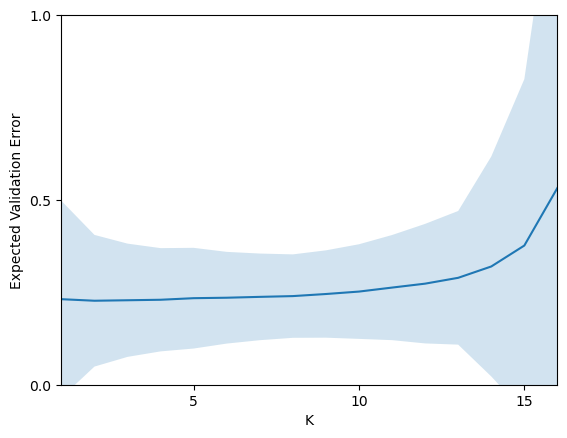

In [4]:
import numpy as np
import math
from pandas import *
import matplotlib.pyplot as plt
import pandas as pd
 
# reading CSV file
data1 = read_csv("HeightWeight20.csv")
data2 = read_csv("HeightWeight20.csv")
 
# converting column data to list
Height = data1['Height'].tolist()
Weight = data1['Weight'].tolist()


# Split the data into training and test sets (80% training, 20% test)
def train_test_split(X, y, train_size):
    n_samples = len(X)
    n_train = int(n_samples * train_size)
    indices = np.random.permutation(n_samples)
    X_test = X[indices[:-n_train]]
    y_test = y[indices[:-n_train]]
    X_train = X[indices[-n_train:]]
    y_train = y[indices[-n_train:]]
    return X_train, X_test, y_train, y_test


# Define linear regression model and fit it to the training data
def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

#Mean square error
def MSE(X_train, X_test, y_train, y_test):
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = Normal_Equation(X_train,y_train)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1*X_test)-y_test)**2)
    return S/(len(X_test))

#Hold out
def holdout(X, y, train_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size)
    return MSE(X_train, X_test, y_train, y_test)

train = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2]
all_data = {seed: [] for seed in train}
mse_data = {seed: [] for seed in train}

#Create csv for each csv file 

for i in  train:
    for j in range(1,2000):
        # Generate synthetic data
        np.random.seed(j)
        X = np.random.uniform(-1, 1, size=(20, 1))
        y = np.sin(np.pi * X)
        mse = holdout(X, y, train_size=i)
        rmse = math.sqrt(mse)
        all_data[i].append(rmse)
        mse_data[i].append(mse) 
        

rmse = math.sqrt(MSE(X, X, y, y))
print('RMSE',rmse)
print('------')

df1 = pd.DataFrame(all_data)
column_averages = df1.mean()
column_std = df1.std()
df1 = df1.append(column_averages, ignore_index=True)
df1 = df1.append(column_std, ignore_index=True)
df1 = df1.rename(index=lambda x: x + 1)
df1 = df1.rename({df1.index[-2]: 'Averages', df1.index[-1]: 'Std'}, axis='index')
df1 = df1.round(3)
print("DataFrame RMSE:")
print(df1)

df2 = pd.DataFrame(mse_data)
column_averages_mse = df2.mean()
column_std_mse = df2.std()
df2 = df2.append(column_averages_mse, ignore_index=True)
df2 = df2.append(column_std_mse, ignore_index=True)
df2 = df2.rename(index=lambda x: x + 1)
df2 = df2.rename({df2.index[-2]: 'Averages', df2.index[-1]: 'Std'}, axis='index')
df2 = df2.round(3)
print("DataFrame MSE:")
print(df2)

column_averages_mse = column_averages_mse.tolist()
column_std_mse = column_std_mse.tolist()
result_list1 = [column_averages_mse[i] + column_std_mse[i] for i in range(min(len(column_averages_mse), len(column_std_mse)))]
result_list2 = [column_averages_mse[i] - column_std_mse[i] for i in range(min(len(column_averages_mse), len(column_std_mse)))]

plt.plot(range(1,17),column_averages_mse)
plt.fill_between(range(1,17), result_list1, result_list2, alpha = 0.2)
plt.xticks([0,5,10,15])
plt.yticks([0,0.5,1])
plt.xlabel('K')
plt.ylabel('Expected Validation Error')
plt.xlim([1,16])
plt.ylim([0,1])
plt.show()

df1.to_csv('holdout_generate.csv', index_label='Row')


Noisy

RMSE 0.5768735232471279
------
DataFrame RMSE:
           0.95   0.90   0.85   0.80   0.75   0.70   0.65   0.60   0.55  \
1         1.101  0.790  0.732  0.657  0.673  0.721  0.805  0.781  0.729   
2         0.290  0.205  0.993  0.878  0.800  0.732  0.743  0.714  0.672   
3         0.368  0.260  0.274  0.348  0.315  0.488  0.734  0.718  0.692   
4         0.755  0.535  0.439  0.831  0.770  0.720  0.670  0.800  0.751   
5         0.016  0.069  0.261  0.373  0.508  0.467  0.479  0.779  0.673   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
1997      0.112  0.828  0.711  0.744  0.665  0.612  0.894  0.908  0.965   
1998      1.870  1.347  1.138  0.981  0.936  0.854  0.792  0.741  0.697   
1999      0.050  0.907  0.746  0.832  0.744  0.705  0.660  0.636  0.596   
Averages  0.578  0.645  0.669  0.687  0.695  0.698  0.710  0.720  0.731   
Std       0.441  0.326  0.268  0.243  0.223  0.207  0.203  0.199  0.197   

           0.50   0.45   0.40   0.35   0.30   0.25  

C:\Users\Best\AppData\Local\Temp\ipykernel_34132\1507989000.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(column_averages, ignore_index=True)
C:\Users\Best\AppData\Local\Temp\ipykernel_34132\1507989000.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(column_std, ignore_index=True)
C:\Users\Best\AppData\Local\Temp\ipykernel_34132\1507989000.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(column_averages_mse, ignore_index=True)
C:\Users\Best\AppData\Local\Temp\ipykernel_34132\1507989000.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(column_std_mse, i

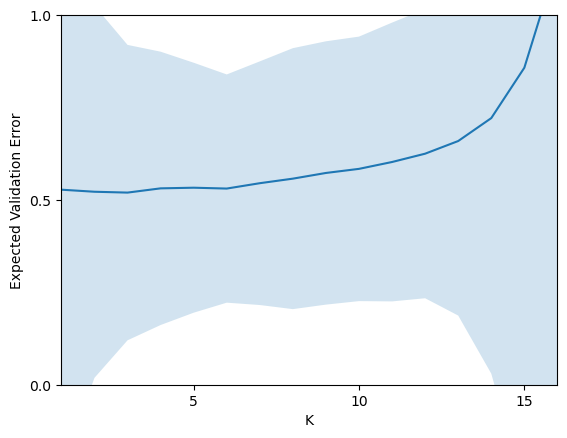

In [2]:
import numpy as np
import math
from pandas import *
import matplotlib.pyplot as plt
import pandas as pd
 
# reading CSV file
data1 = read_csv("HeightWeight20.csv")
data2 = read_csv("HeightWeight20.csv")
 
# converting column data to list
Height = data1['Height'].tolist()
Weight = data1['Weight'].tolist()


# Split the data into training and test sets (80% training, 20% test)
def train_test_split(X, y, train_size):
    n_samples = len(X)
    n_train = int(n_samples * train_size)
    indices = np.random.permutation(n_samples)
    X_test = X[indices[:-n_train]]
    y_test = y[indices[:-n_train]]
    X_train = X[indices[-n_train:]]
    y_train = y[indices[-n_train:]]
    return X_train, X_test, y_train, y_test


# Define linear regression model and fit it to the training data
def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

#Mean square error
def MSE(X_train, X_test, y_train, y_test):
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = Normal_Equation(X_train,y_train)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1*X_test)-y_test)**2)
    return S/(len(X_test))

#Hold out
def holdout(X, y, train_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size)
    return MSE(X_train, X_test, y_train, y_test)

train = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2]
all_data = {seed: [] for seed in train}
mse_data = {seed: [] for seed in train}

#Create csv for each csv file 

for i in  train:
    for j in range(1,2000):
        # Generate synthetic data
        np.random.seed(j)
        X = np.random.uniform(-1, 1, size=(20, 1))
        y = np.sin(np.pi * X) + np.random.normal(0, 0.5, size=(20, 1))
        mse = holdout(X, y, train_size=i)
        rmse = math.sqrt(mse)
        all_data[i].append(rmse)
        mse_data[i].append(mse) 
        

rmse = math.sqrt(MSE(X, X, y, y))
print('RMSE',rmse)
print('------')

df1 = pd.DataFrame(all_data)
column_averages = df1.mean()
column_std = df1.std()
df1 = df1.append(column_averages, ignore_index=True)
df1 = df1.append(column_std, ignore_index=True)
df1 = df1.rename(index=lambda x: x + 1)
df1 = df1.rename({df1.index[-2]: 'Averages', df1.index[-1]: 'Std'}, axis='index')
df1 = df1.round(3)
print("DataFrame RMSE:")
print(df1)

df2 = pd.DataFrame(mse_data)
column_averages_mse = df2.mean()
column_std_mse = df2.std()
df2 = df2.append(column_averages_mse, ignore_index=True)
df2 = df2.append(column_std_mse, ignore_index=True)
df2 = df2.rename(index=lambda x: x + 1)
df2 = df2.rename({df2.index[-2]: 'Averages', df2.index[-1]: 'Std'}, axis='index')
df2 = df2.round(3)
print("DataFrame MSE:")
print(df2)

column_averages_mse = column_averages_mse.tolist()
column_std_mse = column_std_mse.tolist()
result_list1 = [column_averages_mse[i] + column_std_mse[i] for i in range(min(len(column_averages_mse), len(column_std_mse)))]
result_list2 = [column_averages_mse[i] - column_std_mse[i] for i in range(min(len(column_averages_mse), len(column_std_mse)))]

plt.plot(range(1,17),column_averages_mse)
plt.fill_between(range(1,17), result_list1, result_list2, alpha = 0.2)
plt.xticks([0,5,10,15])
plt.yticks([0,0.5,1])
plt.xlabel('K')
plt.ylabel('Expected Validation Error')
plt.xlim([1,16])
plt.ylim([0,1])
plt.show()

df1.to_csv('holdout_generate_noisy.csv', index_label='Row')
